#📌 Extracão

In [151]:
import pandas as pd
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
dados_telecom = pd.read_json(url)
dados_telecom

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformação

É possível verificar os tipos de dados de duas formas diferentes, utilizando a função info ou o atríbuto dtypes:

In [152]:
dados_telecom.info()
dados_telecom.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


Normalização dos dados para análise das colunas:

In [153]:
df_customer = pd.json_normalize(dados_telecom['customer'], sep='_')
df_phone = pd.json_normalize(dados_telecom['phone'], sep='_')
df_internet = pd.json_normalize(dados_telecom['internet'], sep='_')
df_account = pd.json_normalize(dados_telecom['account'], sep='_')

Remoção das colunas originais:

In [154]:
dados_telecom = dados_telecom.drop(['customer', 'phone', 'internet', 'account'], axis=1)

Concatenação dos DataFrames que já foram normalizados acima:

In [155]:
dados_telecom = pd.concat([dados_telecom, df_customer, df_phone, df_internet, df_account], axis=1)

Visualização do DataFrame final:

In [156]:
#mostra todas as colunas:
pd.set_option('display.max_columns', None)

#DataFrame
dados_telecom

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Tradução das colunas para o Português:


In [157]:
dados_telecom.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Evasao',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Parceiro',
    'Dependents': 'Dependentes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Provedor_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Online',
    'PaymentMethod': 'Forma_Pagamento',
    'Charges_Monthly': 'Total_Mensal',
    'Charges_Total': 'Total_Gasto'
}, inplace=True)

dados_telecom

,ID_Cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Provedor_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Total_Mensal,Total_Gasto
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Verifica se há colunas com registros nulos:

In [158]:
dados_telecom.isnull().sum()

,0
ID_Cliente,0
Evasao,0
Genero,0
Idoso,0
Parceiro,0
Dependentes,0
Meses_Contrato,0
Servico_Telefone,0
Multiplas_Linhas,0
Provedor_Internet,0


Verifica se há strings vazias:

In [159]:
((dados_telecom == '').sum())

,0
ID_Cliente,0
Evasao,224
Genero,0
Idoso,0
Parceiro,0
Dependentes,0
Meses_Contrato,0
Servico_Telefone,0
Multiplas_Linhas,0
Provedor_Internet,0


Substitui os valores vazios por "Não informado":

In [160]:
dados_telecom['Evasao'] = dados_telecom['Evasao'].replace('', 'Não informado')

#Verifica os valores unicos para saber se a alteração ocorreu
dados_telecom['Evasao'].unique()

array(['No', 'Yes', 'Não informado'], dtype=object)

Verifica novamente os tipos de dados para tratamento:

In [161]:
dados_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Evasao                7267 non-null   object 
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Parceiro              7267 non-null   object 
 5   Dependentes           7267 non-null   object 
 6   Meses_Contrato        7267 non-null   int64  
 7   Servico_Telefone      7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Provedor_Internet     7267 non-null   object 
 10  Seguranca_Online      7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_Filmes     

Converte automaticamente para os tipos de dados corretos:

In [162]:
dados_telecom = dados_telecom.convert_dtypes()
dados_telecom.dtypes


,0
ID_Cliente,string[python]
Evasao,string[python]
Genero,string[python]
Idoso,Int64
Parceiro,string[python]
Dependentes,string[python]
Meses_Contrato,Int64
Servico_Telefone,string[python]
Multiplas_Linhas,string[python]
Provedor_Internet,string[python]


Converte a coluna Total_Gasto para Float64:

In [163]:
import numpy as np

#Substitui strings vazias ou só com espaços por NaN
dados_telecom['Total_Gasto'] = dados_telecom['Total_Gasto'].replace(r'^\s*$', np.nan, regex=True)

#Converte para float64
dados_telecom['Total_Gasto'] = pd.to_numeric(dados_telecom['Total_Gasto'], errors='coerce')


Verifica se há valores NaN:


In [164]:
dados_telecom.isna().sum()

,0
ID_Cliente,0
Evasao,0
Genero,0
Idoso,0
Parceiro,0
Dependentes,0
Meses_Contrato,0
Servico_Telefone,0
Multiplas_Linhas,0
Provedor_Internet,0


Remove os valores nulos:

In [165]:
dados_telecom = dados_telecom.dropna(subset=['Total_Gasto'])

dados_telecom.isna().sum()


,0
ID_Cliente,0
Evasao,0
Genero,0
Idoso,0
Parceiro,0
Dependentes,0
Meses_Contrato,0
Servico_Telefone,0
Multiplas_Linhas,0
Provedor_Internet,0


Criação da coluna de Contas Diárias:

In [166]:
dados_telecom['Contas_Diarias'] = dados_telecom['Total_Mensal'] / 30
dados_telecom

,ID_Cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Provedor_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Total_Mensal,Total_Gasto,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.1,1873.7,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.3,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [167]:
dados_telecom.dtypes

,0
ID_Cliente,string[python]
Evasao,string[python]
Genero,string[python]
Idoso,Int64
Parceiro,string[python]
Dependentes,string[python]
Meses_Contrato,Int64
Servico_Telefone,string[python]
Multiplas_Linhas,string[python]
Provedor_Internet,string[python]


Conversão e Tradução de valores:

In [168]:
#Tradução de colunas com 3 valores
traducoes_3val = {
    'Yes': 'Sim',
    'No': 'Não',
    'Não informado': 'Não informado',
    'No phone service': 'Sem serviço telefônico',
    'No internet service': 'Sem serviço de internet',
    'Fiber optic': 'Fibra óptica',
    'DSL': 'DSL',
    'One year': 'Um ano',
    'Month-to-month': 'Mensal',
    'Two year': 'Dois anos',
    'Electronic check': 'Cheque eletrônico',
    'Mailed check': 'Cheque enviado por correio',
    'Bank transfer (automatic)': 'Transferência bancária (automática)',
    'Credit card (automatic)': 'Cartão de crédito (automático)'
}

colunas_3val = [
    'Evasao', 'Multiplas_Linhas', 'Provedor_Internet',
    'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
    'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes',
    'Tipo_Contrato', 'Forma_Pagamento'
]

for col in colunas_3val:
    if col in dados_telecom.columns:
        dados_telecom[col] = dados_telecom[col].replace(traducoes_3val)

#Conversão de valores para binários
colunas_binario = ['Parceiro', 'Dependentes', 'Servico_Telefone', 'Fatura_Online']

for col in colunas_binario:
    if col in dados_telecom.columns:
        dados_telecom[col] = dados_telecom[col].map({'Yes': 1, 'No': 0})

#Tradução da coluna Genero
dados_telecom['Genero'] = dados_telecom['Genero'].replace({'Female': 'Feminino', 'Male': 'Masculino'})

dados_telecom.head()

,ID_Cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Provedor_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Total_Mensal,Total_Gasto,Contas_Diarias
0,0002-ORFBO,Não,Feminino,0,1,1,9,1,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Um ano,1,Cheque enviado por correio,65.6,593.3,2.186667
1,0003-MKNFE,Não,Masculino,0,0,0,9,1,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,0,Cheque enviado por correio,59.9,542.4,1.996667
2,0004-TLHLJ,Sim,Masculino,0,0,0,4,1,Não,Fibra óptica,Não,Não,Sim,Não,Não,Não,Mensal,1,Cheque eletrônico,73.9,280.85,2.463333
3,0011-IGKFF,Sim,Masculino,1,1,0,13,1,Não,Fibra óptica,Não,Sim,Sim,Não,Sim,Sim,Mensal,1,Cheque eletrônico,98.0,1237.85,3.266667
4,0013-EXCHZ,Sim,Feminino,1,1,0,3,1,Não,Fibra óptica,Não,Não,Não,Sim,Sim,Não,Mensal,1,Cheque enviado por correio,83.9,267.4,2.796667


#📊 Carga e análise

Cálculo das métricas com describe:

In [169]:
dados_telecom[['Meses_Contrato', 'Total_Mensal', 'Total_Gasto', 'Contas_Diarias']].describe()

,Meses_Contrato,Total_Mensal,Total_Gasto,Contas_Diarias
count,7256.0,7256.0,7256.0,7256.0
mean,32.395535,64.755423,2280.634213,2.158514
std,24.558067,30.125739,2268.632997,1.004191
min,1.0,18.25,18.8,0.608333
25%,9.0,35.45,400.225,1.181667
50%,29.0,70.3,1391.0,2.343333
75%,55.0,89.9,3785.3,2.996667
max,72.0,118.75,8684.8,3.958333


Distribuição da evasão entre clientes:

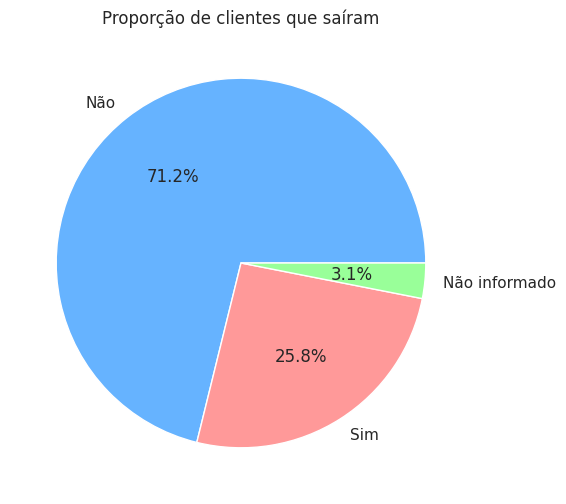

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

evasao_counts = dados_telecom['Evasao'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(evasao_counts, labels=evasao_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999', '#99ff99'])
plt.title('Proporção de clientes que saíram')
plt.show()


Visualização da distribuição de evasão por variáveis categóricas:



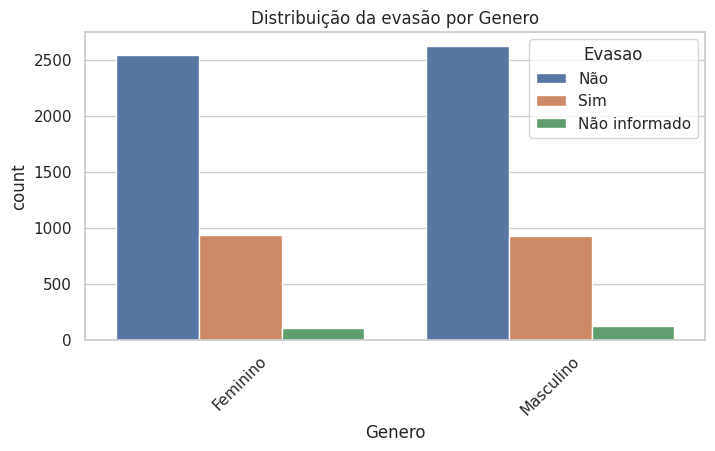

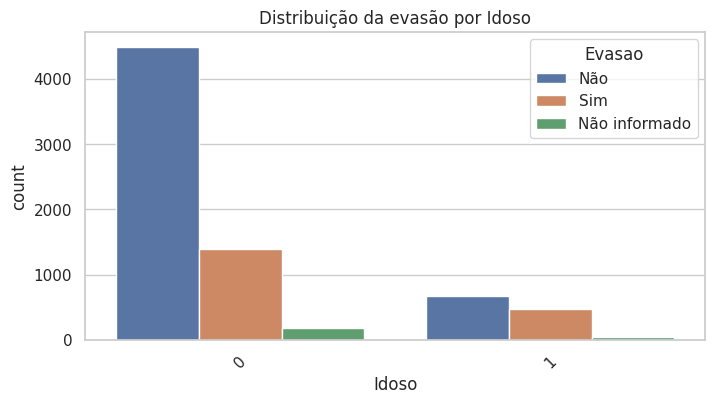

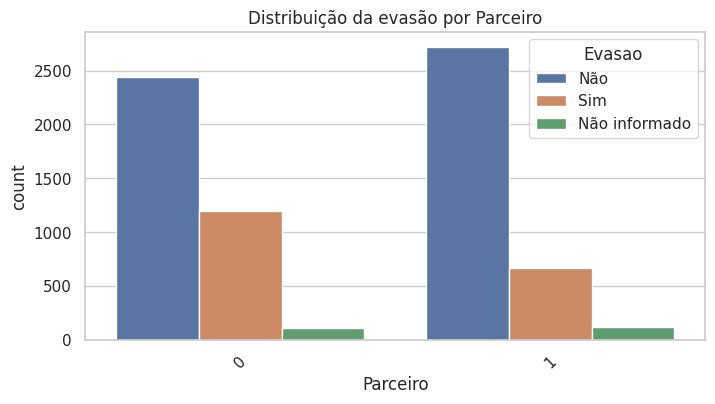

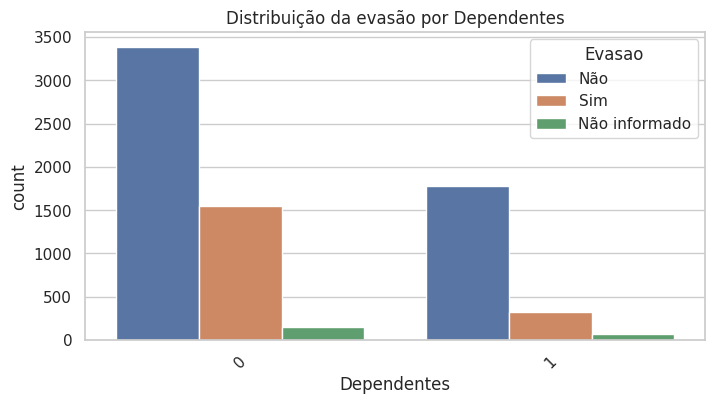

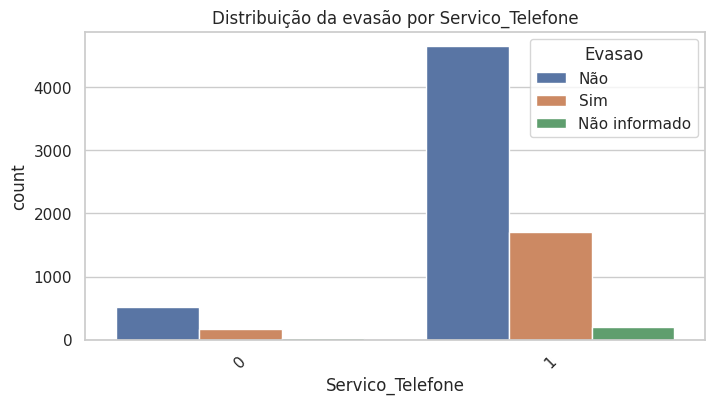

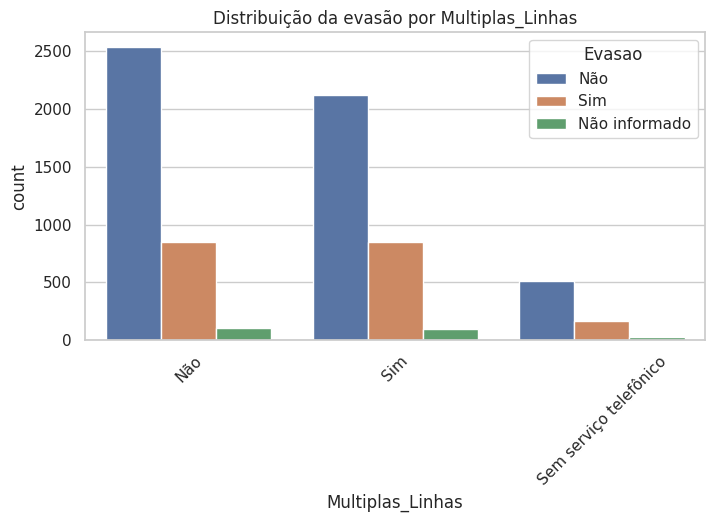

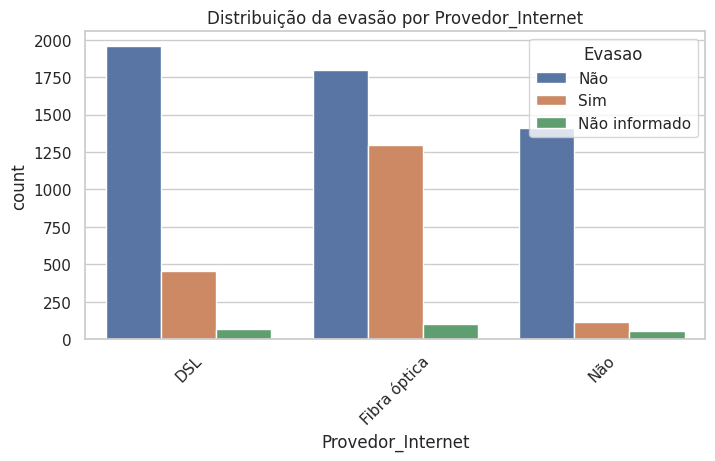

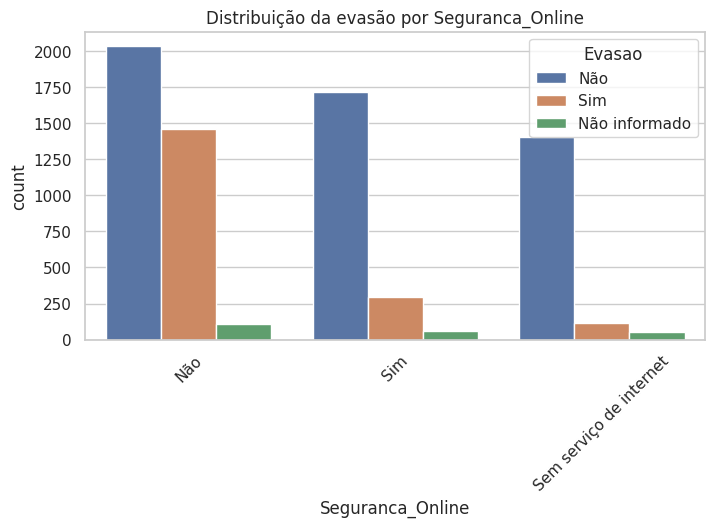

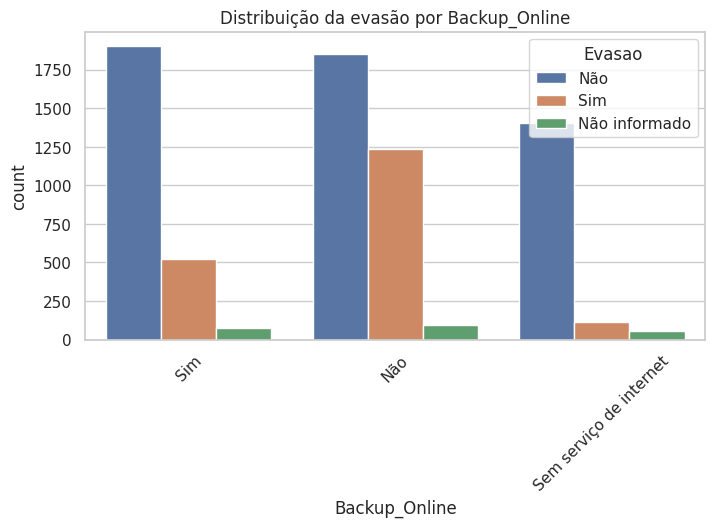

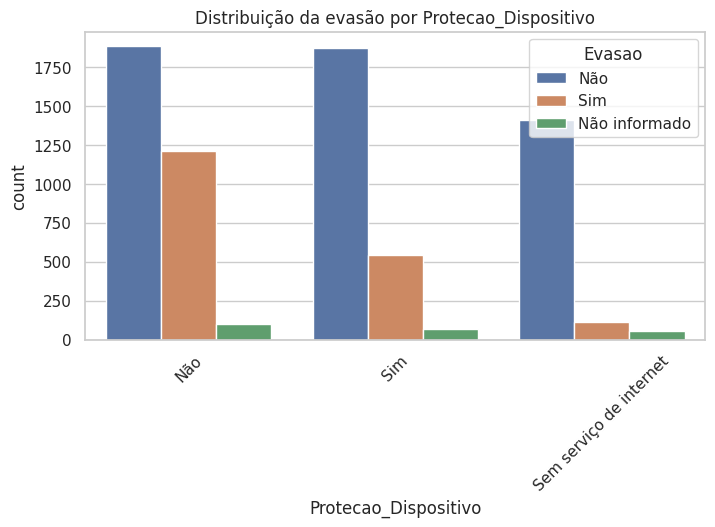

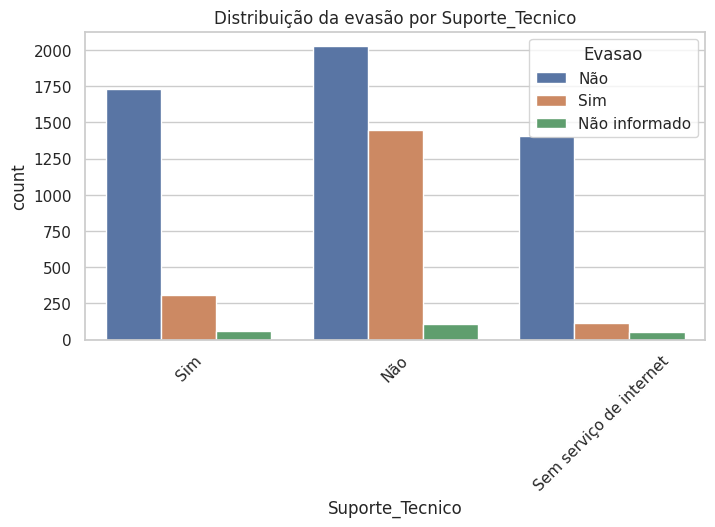

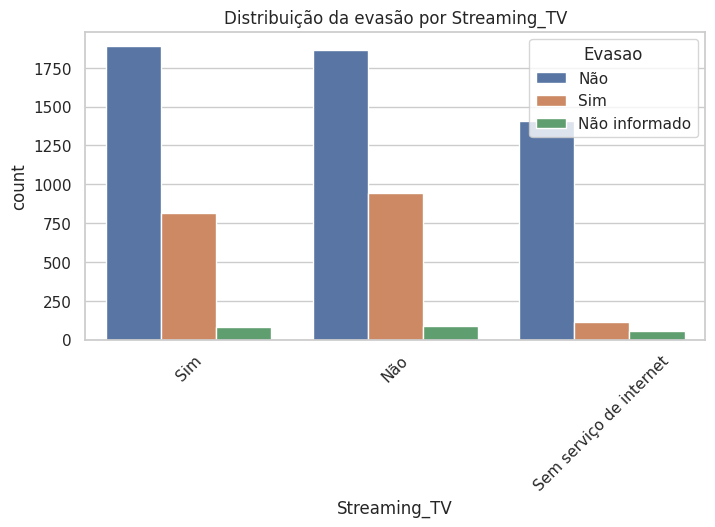

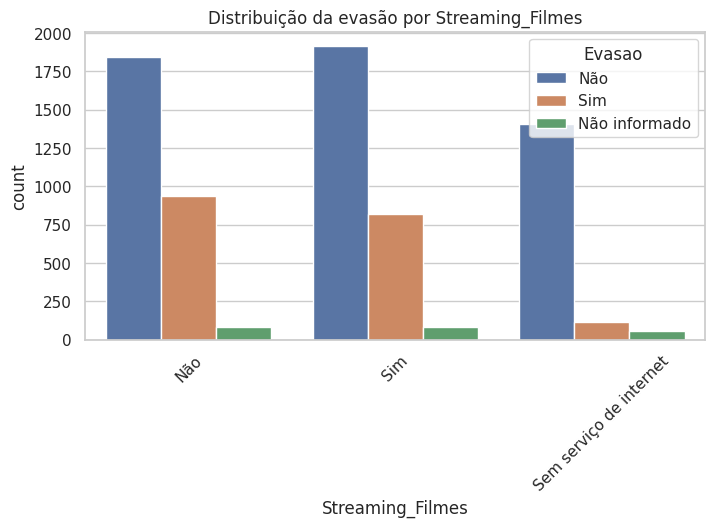

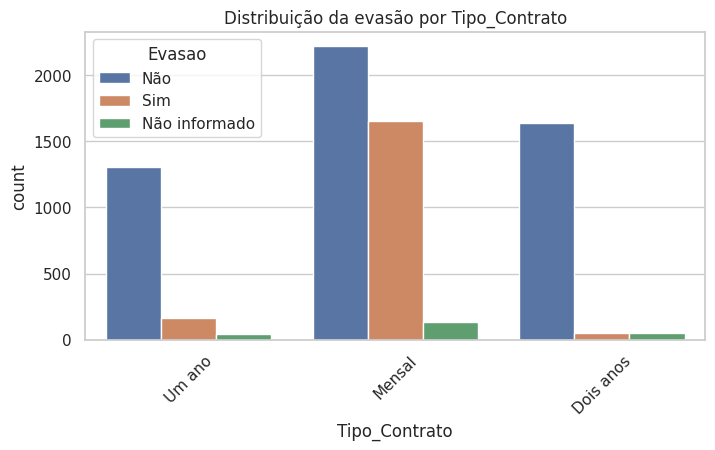

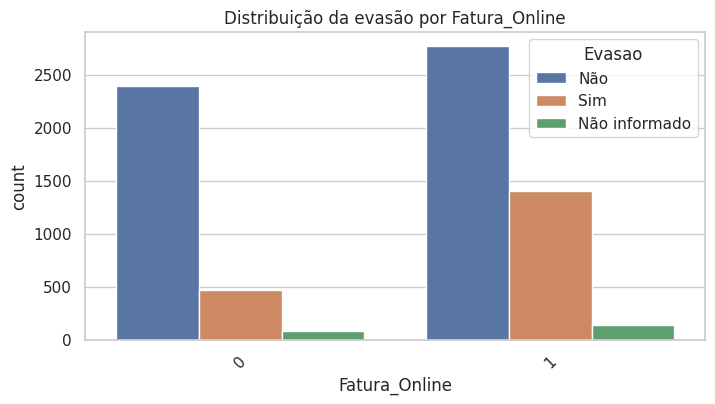

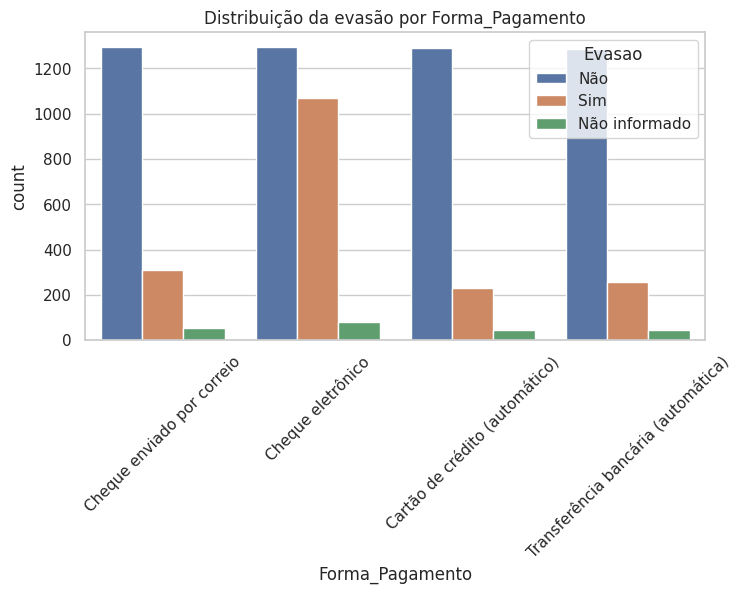

In [174]:
colunas_categoricas = ['Genero', 'Idoso', 'Parceiro', 'Dependentes',
                       'Servico_Telefone', 'Multiplas_Linhas', 'Provedor_Internet',
                       'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
                       'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes',
                       'Tipo_Contrato', 'Fatura_Online', 'Forma_Pagamento']

for coluna in colunas_categoricas:
    plt.figure(figsize=(8,4))
    sns.countplot(data=dados_telecom, x=coluna, hue='Evasao')
    plt.title(f'Distribuição da evasão por {coluna}')
    plt.xticks(rotation=45)
    plt.show()


Visualização da distribuição de evasão por variáveis numéricas:

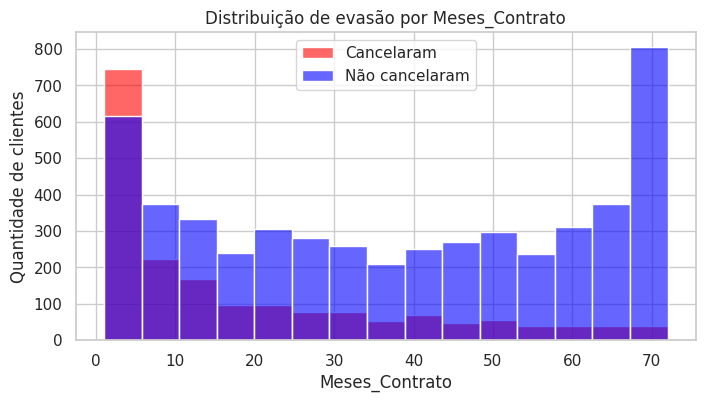

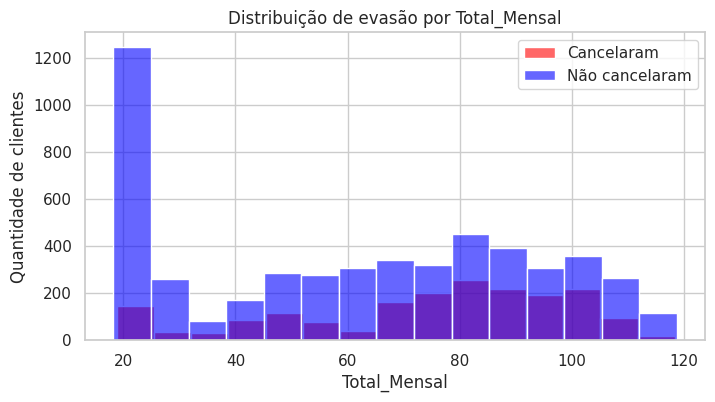

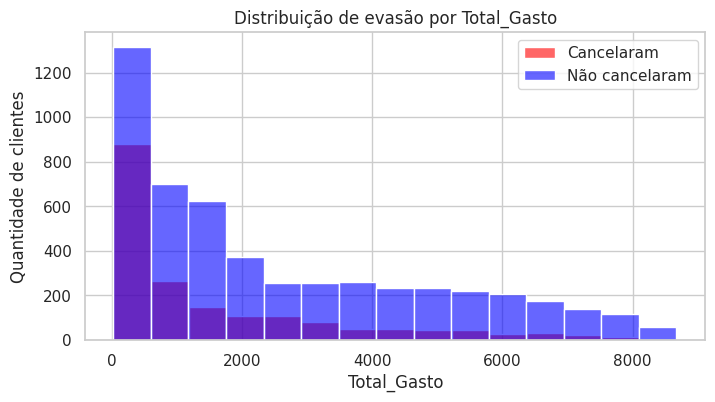

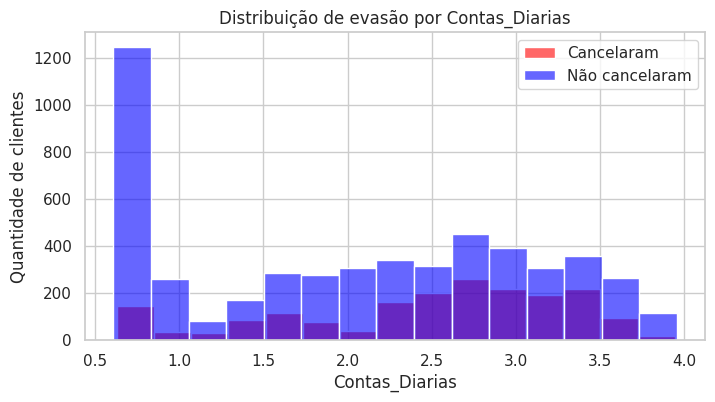

In [182]:
# Lista das variáveis numéricas que queremos analisar
variaveis_numericas = ['Meses_Contrato', 'Total_Mensal', 'Total_Gasto', 'Contas_Diarias']

for coluna in variaveis_numericas:
    plt.figure(figsize=(8,4))

    # Histograma para clientes que cancelaram
    sns.histplot(
        dados_telecom[dados_telecom['Evasao']=='Sim'][coluna],
        color='red', label='Cancelaram', kde=False, bins=15, alpha=0.6
    )

    # Histograma para clientes que não cancelaram
    sns.histplot(
        dados_telecom[dados_telecom['Evasao']=='Não'][coluna],
        color='blue', label='Não cancelaram', kde=False, bins=15, alpha=0.6
    )

    plt.title(f'Distribuição de evasão por {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Quantidade de clientes')
    plt.legend()
    plt.show()

# Extra

Análise de correlação entre variáveis:

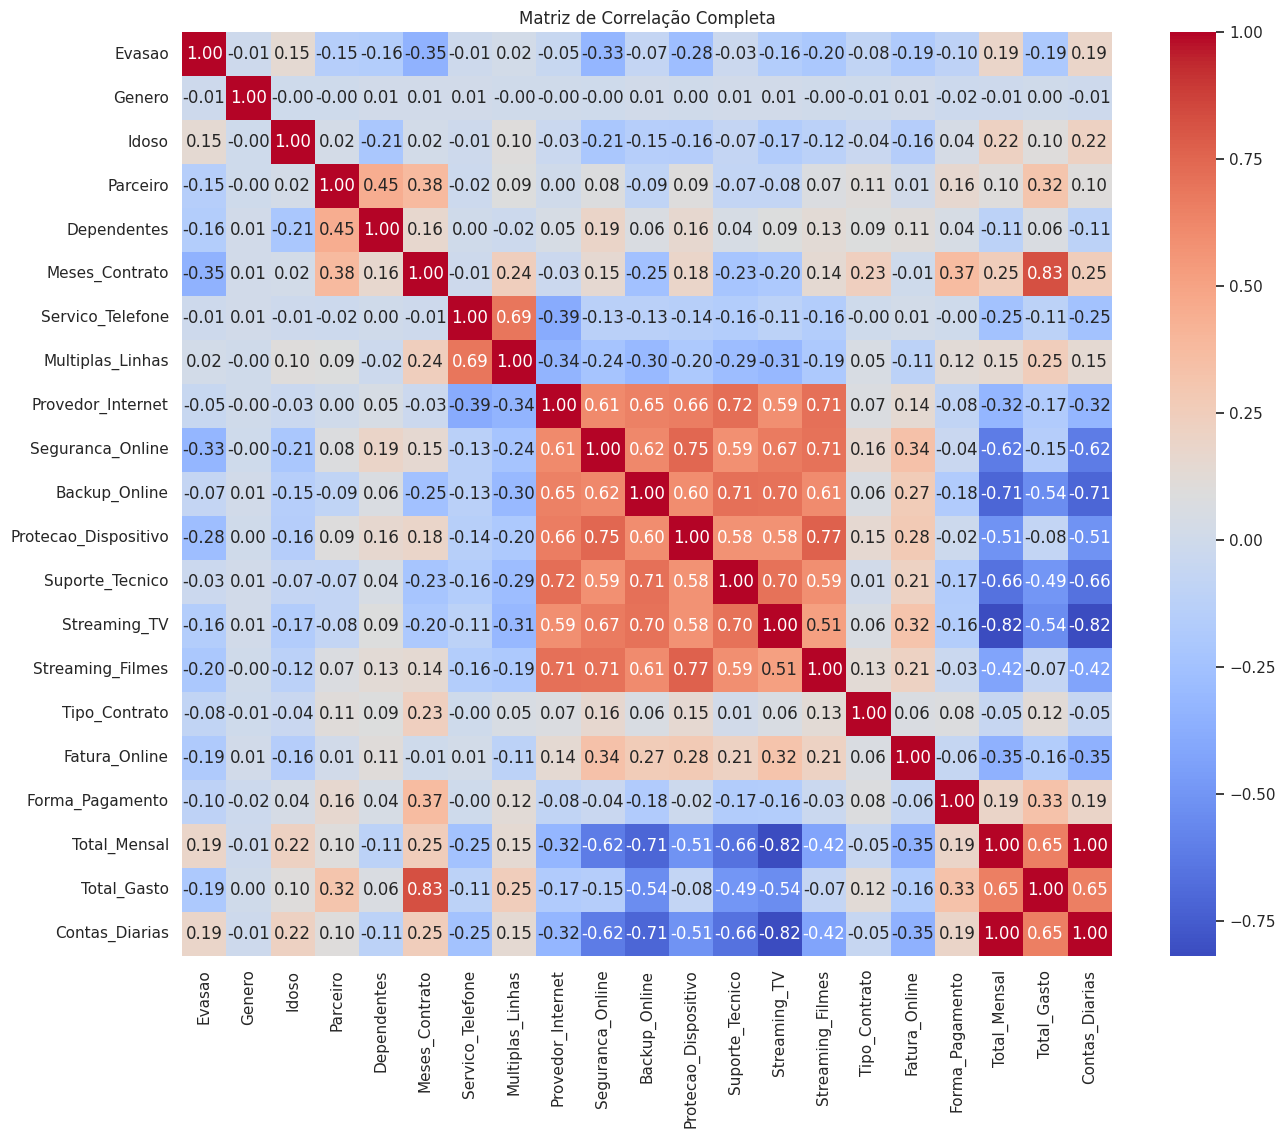

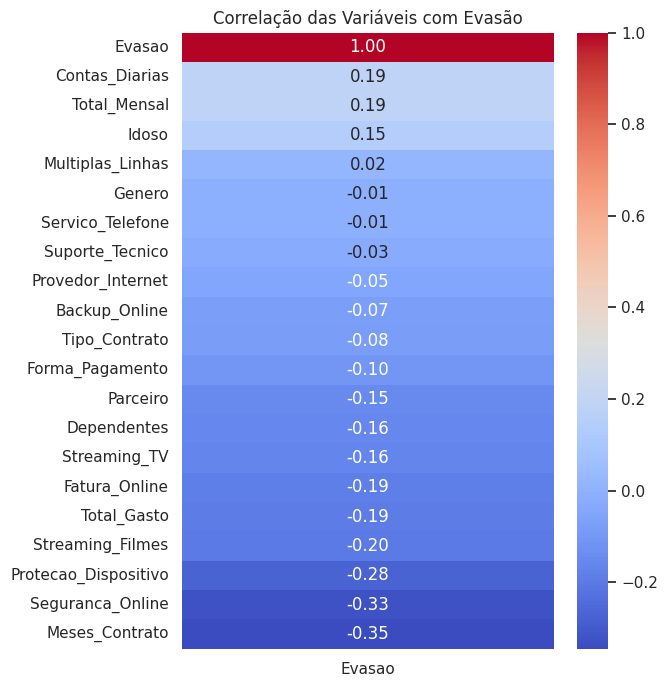

In [185]:
#Copiar o DataFrame
df_corr = dados_telecom.copy()

#Transformar a variável de evasão em numérica
df_corr['Evasao'] = df_corr['Evasao'].map({'Não': 0, 'Sim': 1, 'Não informado': 0})

#Transformar colunas categóricas em numéricas
categorical_cols = ['Genero', 'Servico_Telefone', 'Multiplas_Linhas', 'Provedor_Internet',
                    'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
                    'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Online', 'Forma_Pagamento']

for col in categorical_cols:
    df_corr[col] = pd.factorize(df_corr[col])[0]

#Selecionar apenas colunas numéricas para a correlação
numerical_cols = df_corr.select_dtypes(include=['int64','float64']).columns
corr_matrix = df_corr[numerical_cols].corr()

#Heatmap completo
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação Completa")
plt.show()

#Heatmap apenas com correlação em relação à evasão
corr_evasao = corr_matrix[['Evasao']].sort_values(by='Evasao', ascending=False)

plt.figure(figsize=(6,8))
sns.heatmap(corr_evasao, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlação das Variáveis com Evasão")
plt.show()


#📄Relatorio Final

O objetivo desta análise é compreender os fatores que influenciam a evasão de clientes na empresa TelecomX.
A evasão ocorre quando um cliente decide cancelar seu contrato e deixar de utilizar os serviços da empresa. Esse fenômeno é um problema relevante, pois afeta diretamente a continuidade do negócio. Entender o perfil e os motivos que levam um cliente a evadir-se permite que a empresa crie estratégias mais eficazes para sua permanência.

A base de dados foi obtida a partir do arquivo JSON *TelecomX_Data.json* e continha informações aninhadas sobre clientes, telefonia, internet e conta.

**O processo de preparação incluiu as seguintes etapas:**
1. Extração e Normalização: As colunas aninhadas foram separadas em DataFrames e depois concatenadas.
2. Remoção de colunas originais após a normalização para evitar redundância.
3. Renomeação e tradução de colunas para o português, facilitando a interpretação.
4. Tratamento de valores nulos e strings vazias, substituindo ou removendo registros inconsistentes.
5. Conversão de tipos de dados.
6. Criação de nova variável coluna: Contas_Diarias, calculada como Total_Mensal / 30.

**Foram realizadas análises descritivas e visualizações para identificar padrões:**
1. Distribuição de Evasão: Proporção de clientes que permaneceram versus os que evadiram.
2. Análise por Variáveis Categóricas: Gênero, presença de dependentes, uso de serviços adicionais, tipo de contrato, etc.
3.Análise por Variáveis Numéricas: Comparação de médias de Meses_Contrato, Total_Mensal e Total_Gasto entre clientes evadidos e ativos.
4.Matriz de Correlação: Identificação das variáveis mais correlacionadas com a evasão.

**Exemplos de insights visuais obtidos através das leituras e interpretações dos gráficos:**

- Clientes com menos meses de contrato apresentaram taxa de evasão mais alta.

- Valores mensais mais altos estão levemente associados a maior evasão.

- A variável com maior correlação negativa com a evasão é Meses_Contrato (-0,35), indicando que clientes mais antigos tendem a permanecer.

- Existe correlação positiva entre evasão e Total_Mensal (0,19), sugerindo que mensalidades mais altas podem aumentar a taxa de saída.

- A presença de serviços adicionais, como Proteção de Dispositivo e Streaming de Filmes, está associada a diferenças no comportamento de evasão dos clientes.

- O gênero não mostrou correlação relevante com a evasão.

**Recomendações:**
- Criar programas de fidelidade voltados para novos clientes, incentivando-os a permanecer por mais tempo.
- Acompanhar novos clientes, para criação de um vínculo e bom relacionamento, atento as necessidades.
- Oferecer planos com descontos para clientes com mensalidades mais altas, visando reduzir o impacto na evasão.- Analisar pacotes de serviços adicionais para entender se a combinação de ofertas influencia na retenção.
- Monitorar clientes nos primeiros meses de contrato para identificar sinais precoces de evasão.